# Summary of Explanatory Analysis for Music in a Car

## Introduction

In this report we present the analysis conducted using a data set collected for the purpose of development of <i>InCarMusic</i> recommendation system [1]. The data has been obtained using web-based questionnaires, and contains users' ratings (ranging from 1 to 5 stars) of a set of music tracks  under different contextual conditions occuring while driving a car. The main purpose of the analysis was to determine whether and how do respondents' musical preferences are influenced by different driving-related conditions.

The scope of the analysis is as follows:

<ul>
<li> Verification of the findins from Section 4.3 in [1]: impact of contextual conditions on ratings.
<li> Determining the influence of each condition on ratings.
<li> General characterization of the dataset: distributions of ratings per condition/genre.
</ul>

Since the data has been collected using interview tool, as opposed to collecting them in a real driving conditions, the obtained results should be considered inaccurate and uncertain, thus in many cases may not be representative. 


[1] Baltrunas, Linas, et al. "Incarmusic: Context-aware music recommendations in a car." E-Commerce and Web Technologies. Springer Berlin Heidelberg, 2011. 89-100.

## Dataset characterization

The paper [1] presents two experiments used to validate the influence of contextual conditions on tracks' ratings (sections 4.2 and 4.3, respectively). The available data allows to reproduce only the second experiment, described in Section 4.3: impact of contextual conditions on ratings. The dataset slightly differs from the one reported in the paper, as here we have responses from 42 users (the paper reports 66), and data consists of 973 ratings without context (the paper reports 955). As otherwise the ratings statistics appear to be very similar, we assume that they are different samples obtained in an otherwise identical experiment.

Let us prepare the data for the further analysis.

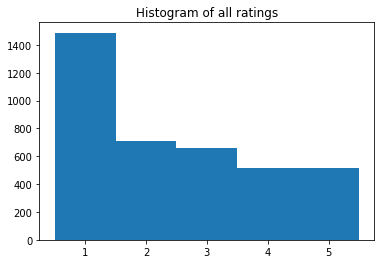

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
from scipy import stats
from functools import reduce
from operator import and_
from matplotlib import pyplot as plt

data = pd.read_excel("data/Data_InCarMusic.xlsx", sheet_name=["ContextualRating", "Music Track"])
genres = pd.read_excel("data/Data_InCarMusic.xlsx", sheet_name="Music Category", header=None)

contexts = ["DrivingStyle", 
            "landscape", 
            "mood", 
            "naturalphenomena", 
            "RoadType", 
            "sleepiness", 
            "trafficConditions", 
            "weather"]

tracks = data["Music Track"]
ratings = data["ContextualRating"]
ratings = ratings.join(tracks[["id"," category_id"]].set_index("id"), on="ItemID")
ratings.rename(columns = { k : k.strip() for k in ratings.keys() }, inplace=True)    # fix column names
ratings.rename(columns = { "category_id" : "genre"}, inplace=True)
ratings = ratings[ratings["Rating"] != 0]    # exclude zero ratings

plt.title("Histogram of all ratings")
plt.hist(ratings["Rating"], bins=np.arange(1, ratings["Rating"].max() + 1.5) - 0.5)
plt.show()

All the tracks belong to 10 different music genres. Let us take a look how different genres are represented within the dataset:

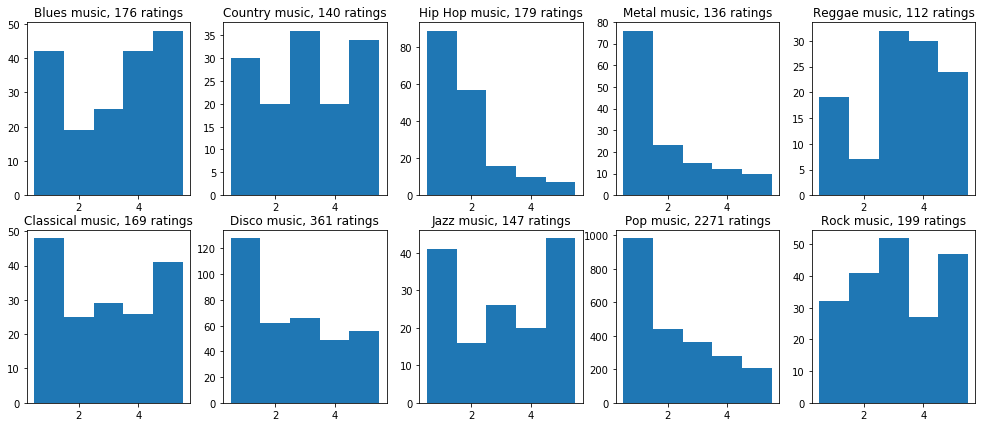

,mean rating
genre,
Blues music,3.198864
Classical music,2.923077
Country music,3.057143
Disco music,2.565097
Hip Hop music,1.821229
Jazz music,3.068027
Metal music,1.948529
Pop music,2.247468
Reggae music,3.294643


In [2]:
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(17, 7), squeeze=True)
index = 0
for genre_id, subset in ratings.groupby("genre")["Rating"]:
    ax = axes[index % 2, index // 2]
    ax.set_title("{0}, {1} ratings".format(genres[1][genre_id-1], len(subset)))
    ax.hist(subset, bins=np.arange(1, subset.max() + 1.5) - 0.5)
    index += 1
plt.show()

genre_ratings = pd.DataFrame(ratings.groupby("genre")["Rating"].mean()).join(genres.set_index(0))
genre_ratings.rename(columns = { 1 : "genre", "Rating" : "mean rating"}, inplace=True)
genre_ratings.set_index("genre", inplace=True)
genre_ratings

There are very visible differences in the ratings distribution shapes of different genres. For instance, most Hip Hop, Metal and Pop tracks have low ratings, while Blues, Reggae, Jazz and Rock tend to get much higher scores.

We can see that pop music is overrepresented in the dataset (2271 samples), while 9 remaining genres have less instances in total (1619 samples). Besides this genre bias, the variance of the number of ratings for each individual track is not too high, thus most of the tracks are represented similarly:

In [3]:
ratings.groupby("ItemID")["Rating"].count().describe()

count    139.000000
mean      27.985612
std        7.589071
min       12.000000
25%       24.000000
50%       28.000000
75%       32.000000
max       48.000000
Name: Rating, dtype: float64

## Verification of results from the original paper

The summary of section 4.3 is presented in Table 3, which provides mean rating values for all music tracks collected under each considered condition (26 conditions in total), comparing them to mean rating values of the same tracks, rated without assuming any conditions. Authors then use t-Student's test to find out if the pairs of mean values are significantly different.

The main issue with this approach is that the t-Student's test assumes normal distribution of samples, while clearly this does not occur under any condition in the considered dataset. The distributions are very strongly skewed toward low values: users tend to dislike most of the tracks used in the experiment, and put highest ratings only to a handful of tracks.

Consequently, as we cannot rely on the results from Table 3, we use nonparametric test instead. One option would be to use Wilcoxon test for paired samples, if we had a rating pair of each track with and without context. Unfortunately, each non-context rating is paired with 3 context ratings, and moreover, there are instances in the dataset that the same track appears more than once for the same user without context. Thus we cannot match the rating pairs as they appeared in the questionnaires. We also cannot apply Kolmogorov-Smirnov test to compare distributions, as the latter assumes continuous random variables.

Instead, we use Mann-Whitney test, which is better suited for ordinal data, like the 5-star rating system, and it does not rely on the shape of distributions.

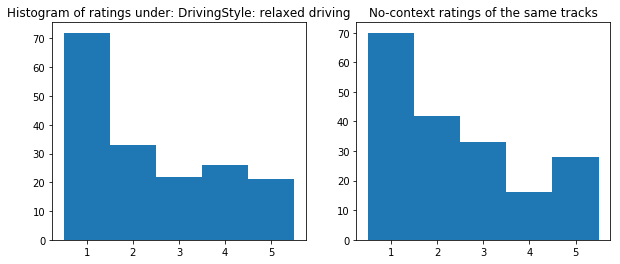

samples do not look gaussian (shapiro p=0.00000, normtest p=0.00000)
samples have similar distributions (Mann-Whitney: U=16003.0000, p=0.3235)


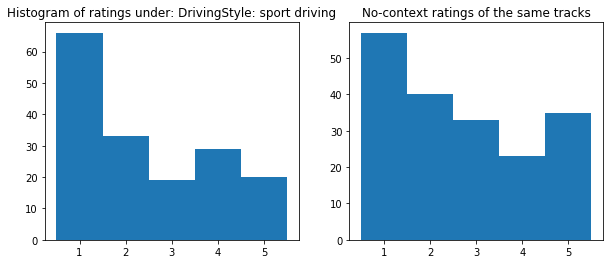

samples do not look gaussian (shapiro p=0.00000, normtest p=0.00000)
samples have different distributions (Mann-Whitney: U=14092.0000, p=0.0431)


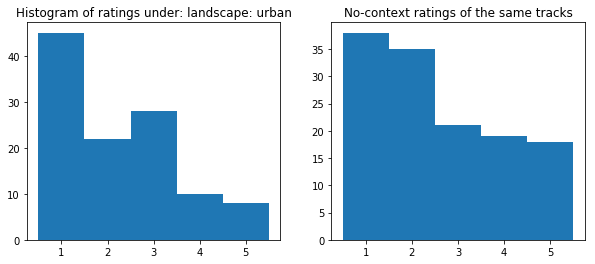

samples do not look gaussian (shapiro p=0.00000, normtest p=0.00505)
samples have different distributions (Mann-Whitney: U=6425.0000, p=0.0333)


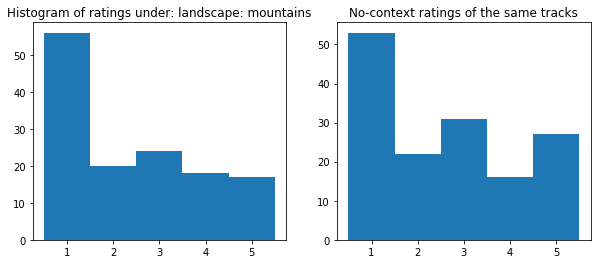

samples do not look gaussian (shapiro p=0.00000, normtest p=0.00000)
samples have similar distributions (Mann-Whitney: U=9291.5000, p=0.1251)


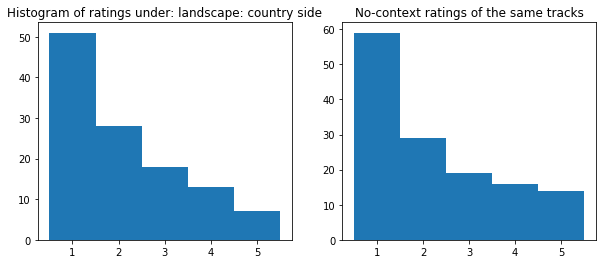

samples do not look gaussian (shapiro p=0.00000, normtest p=0.00128)
samples have similar distributions (Mann-Whitney: U=7722.5000, p=0.2995)


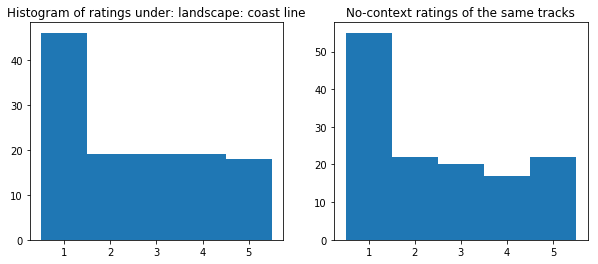

samples do not look gaussian (shapiro p=0.00000, normtest p=0.00000)
samples have similar distributions (Mann-Whitney: U=8426.5000, p=0.6360)


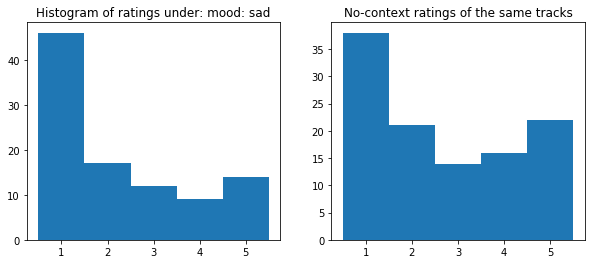

samples do not look gaussian (shapiro p=0.00000, normtest p=0.00020)
samples have different distributions (Mann-Whitney: U=4619.5000, p=0.0252)


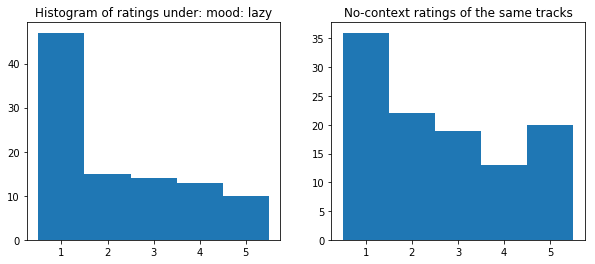

samples do not look gaussian (shapiro p=0.00000, normtest p=0.00017)
samples have different distributions (Mann-Whitney: U=4581.5000, p=0.0198)


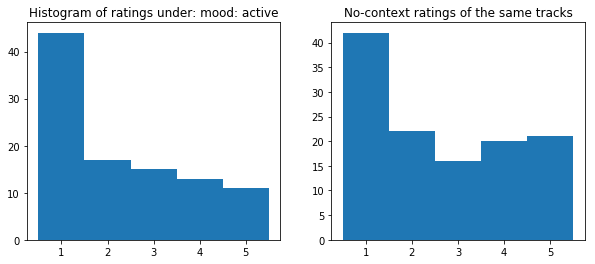

samples do not look gaussian (shapiro p=0.00000, normtest p=0.00007)
samples have different distributions (Mann-Whitney: U=5290.5000, p=0.0478)


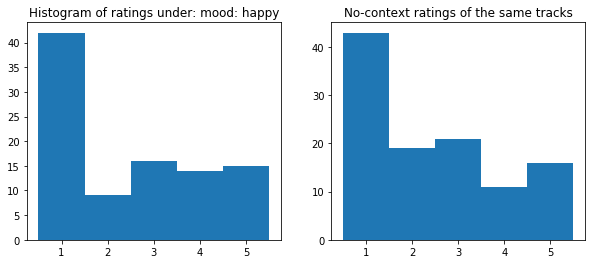

samples do not look gaussian (shapiro p=0.00000, normtest p=0.00000)
samples have similar distributions (Mann-Whitney: U=5304.5000, p=0.5244)


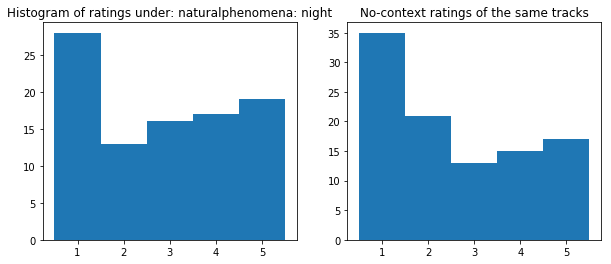

samples do not look gaussian (shapiro p=0.00000, normtest p=0.00000)
samples have similar distributions (Mann-Whitney: U=5139.5000, p=0.8784)


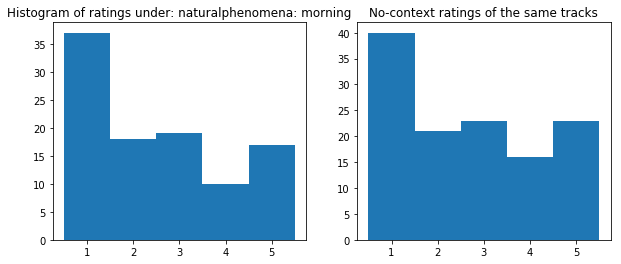

samples do not look gaussian (shapiro p=0.00000, normtest p=0.00000)
samples have similar distributions (Mann-Whitney: U=5842.0000, p=0.2152)


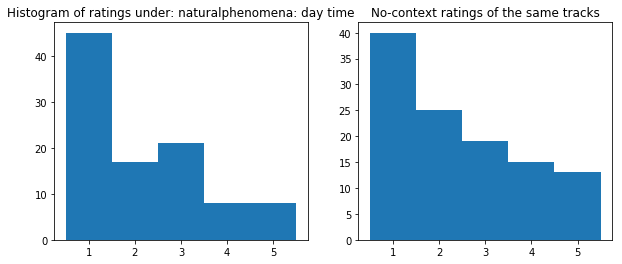

samples do not look gaussian (shapiro p=0.00000, normtest p=0.00397)
samples have similar distributions (Mann-Whitney: U=4933.0000, p=0.0749)


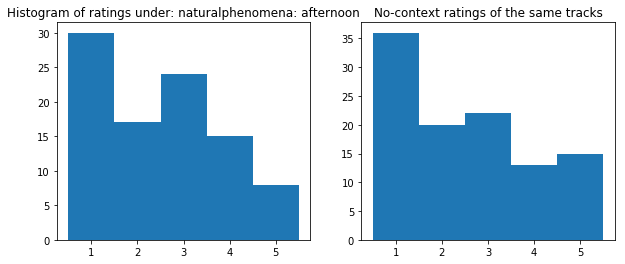

samples do not look gaussian (shapiro p=0.00000, normtest p=0.00012)
samples have similar distributions (Mann-Whitney: U=4985.5000, p=0.5040)


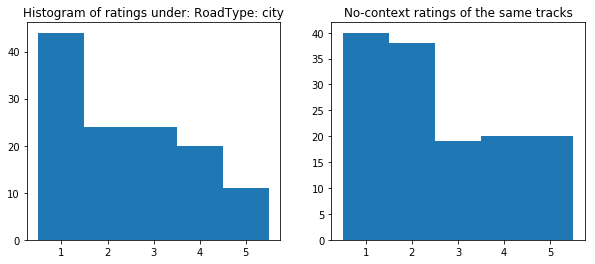

samples do not look gaussian (shapiro p=0.00000, normtest p=0.00000)
samples have similar distributions (Mann-Whitney: U=7933.0000, p=0.2013)


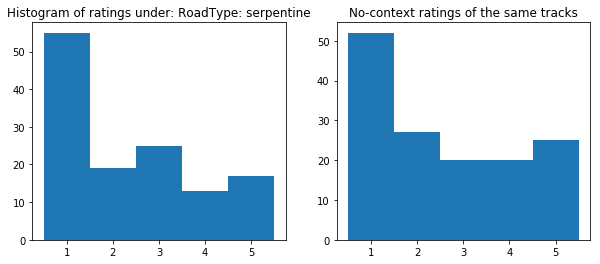

samples do not look gaussian (shapiro p=0.00000, normtest p=0.00000)
samples have similar distributions (Mann-Whitney: U=8552.0000, p=0.1202)


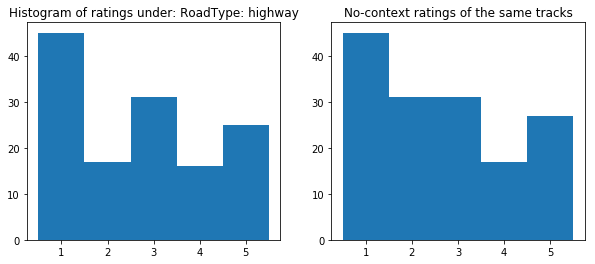

samples do not look gaussian (shapiro p=0.00000, normtest p=0.00000)
samples have similar distributions (Mann-Whitney: U=10163.0000, p=0.5274)


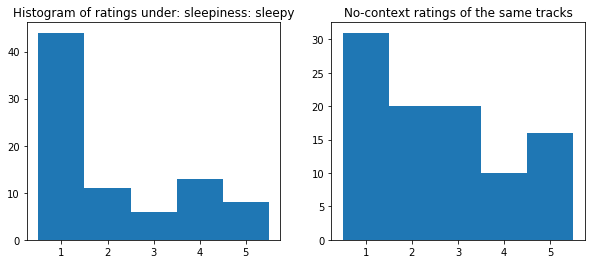

samples do not look gaussian (shapiro p=0.00000, normtest p=0.00044)
samples have different distributions (Mann-Whitney: U=3199.0000, p=0.0093)


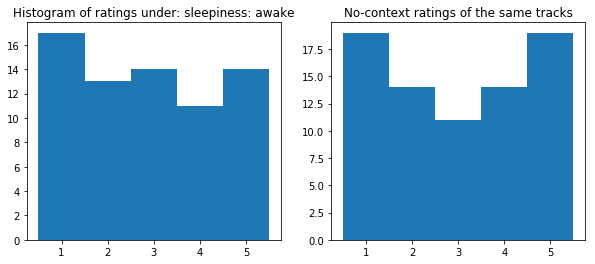

samples do not look gaussian (shapiro p=0.00001, normtest p=0.00000)
samples have similar distributions (Mann-Whitney: U=2544.5000, p=0.3275)


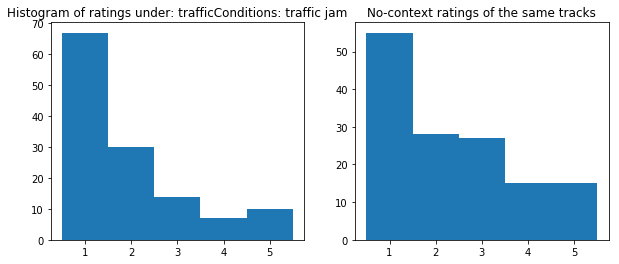

samples do not look gaussian (shapiro p=0.00000, normtest p=0.00000)
samples have different distributions (Mann-Whitney: U=7411.0000, p=0.0048)


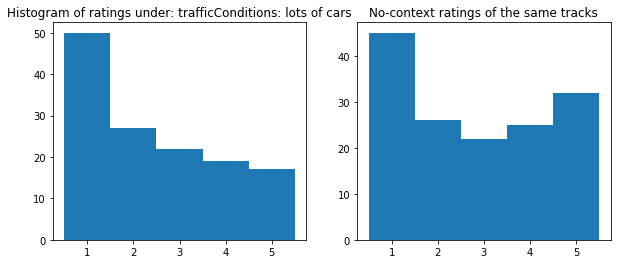

samples do not look gaussian (shapiro p=0.00000, normtest p=0.00000)
samples have different distributions (Mann-Whitney: U=8777.5000, p=0.0230)


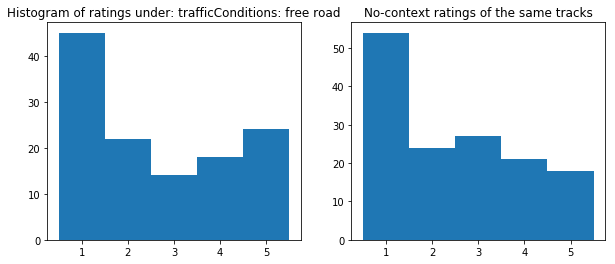

samples do not look gaussian (shapiro p=0.00000, normtest p=0.00000)
samples have similar distributions (Mann-Whitney: U=9267.0000, p=0.7509)


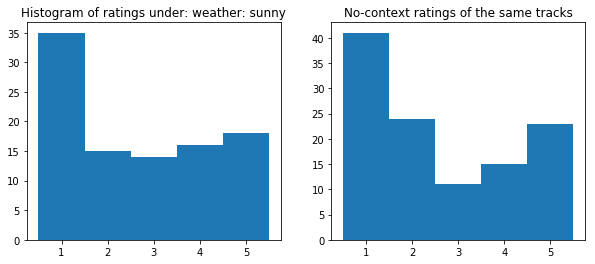

samples do not look gaussian (shapiro p=0.00000, normtest p=0.00000)
samples have similar distributions (Mann-Whitney: U=5680.5000, p=0.5873)


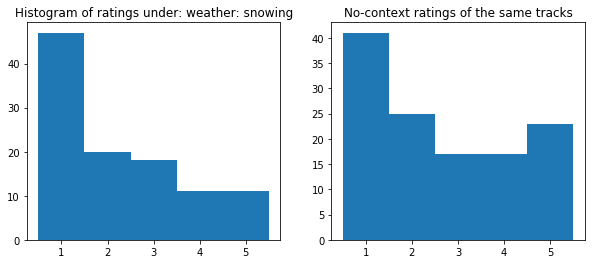

samples do not look gaussian (shapiro p=0.00000, normtest p=0.00083)
samples have different distributions (Mann-Whitney: U=5607.5000, p=0.0224)


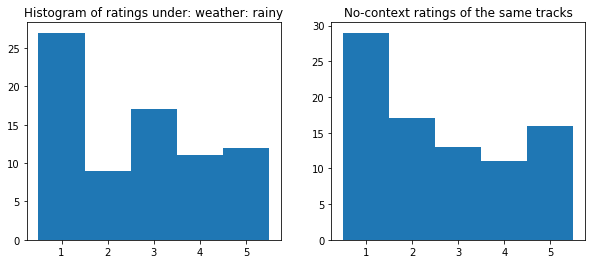

samples do not look gaussian (shapiro p=0.00000, normtest p=0.00000)
samples have similar distributions (Mann-Whitney: U=3267.0000, p=0.4993)


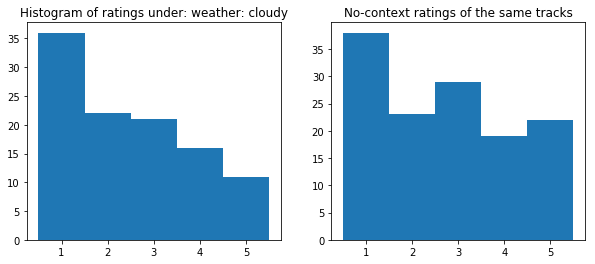

samples do not look gaussian (shapiro p=0.00000, normtest p=0.00001)
samples have similar distributions (Mann-Whitney: U=6270.5000, p=0.0942)


In [4]:
# Select the rows with tracks' ratings without any context
no_context_ratings = ratings[reduce(and_, [ratings[c].isnull() for c in contexts])]
ncr = no_context_ratings

# Consider each context category separately
results = {}
for ctx in contexts:
    ratings_cat = ratings[ratings[ctx].notnull()]
    
    # For each context category we consider the possible condition values
    for cond in ratings_cat[ctx].unique():
        subset = ratings_cat[ratings_cat[ctx] == cond]
        desc_cy = subset["Rating"].describe()
        
        # Select the IDs of tracks that were considered in the given context category
        gk = subset.groupby(["UserID", "ItemID"]).groups.keys()
        
        # Get the ratings of the same tracks without any context category assumed
        ncr_subset = ncr[ncr.set_index(["UserID", "ItemID"]).index.isin(gk)]
        desc_cn = ncr_subset["Rating"].describe()
        
        plt.figure(figsize=(10,4))
        plt.subplot(121)
        plt.title("Histogram of ratings under: {0}: {1}".format(ctx, cond))
        h1, _, _ = plt.hist(subset["Rating"], bins=np.arange(1, subset["Rating"].max() + 1.5) - 0.5)
        pdf1 = h1 / sum(h1)
        
        plt.subplot(122)
        plt.title("No-context ratings of the same tracks")
        h2, _, _ = plt.hist(ncr_subset["Rating"], bins=np.arange(1, ncr_subset["Rating"].max() + 1.5) - 0.5)
        pdf2 = h2 / sum(h2)
        
        plt.show()
        
        # Perform normality tests
        _, p1 = stats.shapiro(subset["Rating"])
        _, p2 = stats.normaltest(subset["Rating"])
        
        if (p1 > 0.05) or (p2 > 0.05):
            print("samples look gaussian (shapiro p={0:.5f}, normtest p={1:.5f})".format(p1, p2))
        else:
            print("samples do not look gaussian (shapiro p={0:.5f}, normtest p={1:.5f})".format(p1, p2))
        
        # Perform Mann-Whitney test
        s, p = stats.mannwhitneyu(subset["Rating"], ncr_subset["Rating"], alternative="less")
        
        if p > 0.05:
            print("samples have similar distributions (Mann-Whitney: U={0:.4f}, p={1:.4f})".format(s, p))
        else:
            print("samples have different distributions (Mann-Whitney: U={0:.4f}, p={1:.4f})".format(s, p))
        
        # Compute Kullback-Leibler divergences for pairs of estimated pdfs
        kl = stats.entropy(pdf1, pdf2)
        results[(ctx, cond)] = (desc_cy, desc_cn, p, kl)
        

Given the obtained statistics we can now rank the contextual conditions in the order of their influence on ratings. We use Kullback-Leibler divergence computed on pairs of estimated probability distributions (one with a given context category, and one without context). The larger the divergence, the more distribution of ratings differ from the base distribution.

In [5]:
df = pd.DataFrame.from_dict(results, orient="index", columns=["desc_cy", "desc_cn", "p", "kl"])

# Select only significant test instances, and sort them by nonincreasing KL divergence values
sig_df = df[df["p"] < 0.05].sort_values("kl", ascending=False)
sig_df["desc_cy"] = sig_df["desc_cy"].apply(func = lambda x: "ratings:{0}, mean:{1:.4f}, std:{2:.4f}".format(int(x["count"]), x["mean"], x["std"]))
sig_df["desc_cn"] = sig_df["desc_cn"].apply(func = lambda x: "ratings:{0}, mean:{1:.4f}, std:{2:.4f}".format(int(x["count"]), x["mean"], x["std"]))
sig_df.rename(columns={"desc_cy":"context stats.", "desc_cn":"no-context stats.", "p":"p-value", "kl":"KL div."}, inplace=True)
sig_df

,context stats.,no-context stats.,p-value,KL div.
"(sleepiness, sleepy)","ratings:82, mean:2.1463, std:1.4582","ratings:97, mean:2.5876, std:1.4488",0.009265,0.161582
"(landscape, urban)","ratings:113, mean:2.2389, std:1.2626","ratings:131, mean:2.5725, std:1.3980",0.033317,0.081817
"(trafficConditions, traffic jam)","ratings:128, mean:1.9297, std:1.2498","ratings:140, mean:2.3357, std:1.3709",0.004814,0.063896
"(mood, lazy)","ratings:99, mean:2.2323, std:1.4202","ratings:110, mean:2.6273, std:1.4953",0.019812,0.060713
"(DrivingStyle, sport driving)","ratings:167, mean:2.4251, std:1.4537","ratings:188, mean:2.6755, std:1.4829",0.043072,0.048797
"(weather, snowing)","ratings:107, mean:2.2430, std:1.3794","ratings:123, mean:2.6423, std:1.5211",0.022444,0.046673
"(mood, sad)","ratings:98, mean:2.2653, std:1.4822","ratings:111, mean:2.6667, std:1.5511",0.025194,0.041302
"(trafficConditions, lots of cars)","ratings:135, mean:2.4519, std:1.4285","ratings:150, mean:2.8200, std:1.5417",0.022994,0.033656
"(mood, active)","ratings:100, mean:2.3000, std:1.4249","ratings:121, mean:2.6364, std:1.5221",0.047791,0.030447


### Conclusions

Our findings are to some degree consistent with the results from [1]. Namely, they concluded that the most significant influence on the music tracks ratings should be observed under the <b>Sleepiness</b> condition with the value <i>sleepy</i>, and the <b>Traffic Conditions</b> with the value <i>traffic jam</i> (both were designated by 3 stars in Table 3). These conditions occupy 1st and 3rd place in our ranking, thus confirm their strong influence. Moreover, the condition of <b>Landscape</b> set to <i>urban</i> from our 2nd rank, as well as also high placed <b>Weather</b> condition of <i>snowing</i> and <b>Mood</b> condition of <i>sad</i>, were also found as significant in the study of [1] (designated 1 star in Table 3). However, we have found that also the <b>Driving style</b> of <i>sport driving</i> and <b>Traffic conditions</b> of <i>lots of cars</i> have significant influence of the ratings, which was not observed in the Table 3 of [1].

We also argue that our analysis is more sound and accurate, as the test in [1] is flawed due to non-satisfied normality assumption. Moreover, we use KL divergence to measure differences in probability distributions, while [1] used only p-values.

It can be also seen that ratings are generally lower under all contextual conditions that give statistically significant results. We can attribute this to the person's feeling of distraction and being annoyed (e.g., during traffic jam or when feeling sleepy), which leads to negative perception of music in general.

When designing recommender system, we suggest to focus on the following points:
<ul>
    <li>The recommender system should take <b>genre</b> into consideration. Distributions of ratings of most genres differ very significantly from each other. Some genres are liked more in general than onters.</li>
    <li>Most important contextual factors that influence the perception of music are <b>Sleepiness</b>, <b>Landscape</b> and <b>Traffic conditions</b>.</li>
    <li>Not all of the considered conditions show significant influence on the ratings. Thus some of them may be omitted from the model in order to simplify it (e.g., <b>Natural phenomena</b>, <b>Road type</b>).</li>
</ul>

Consequently, for the recommender engine we propose Matrix Factorization with baselines that account for genre and contextual categories.

Koren, Y.: Factorization meets the neighborhood: a multifaceted collaborative filtering model. In: KDD 2008: Proceeding of the 14th ACM SIGKDD International Conference on Knowledge Discovery and Data Mining, pp. 426–434.